In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder

In [326]:
df = pd.read_csv("./Train/Train_Data.csv")
dft = pd.read_csv("./Test/Test_Data.csv")

print(df.shape, dft.shape)

(1100, 81) (360, 80)


In [327]:
df["Electrical"]

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1095    SBrkr
1096    SBrkr
1097    SBrkr
1098    SBrkr
1099    SBrkr
Name: Electrical, Length: 1100, dtype: object

In [328]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [329]:
#for f in df["Alley"]:
 #   print(f)

In [330]:
#df.info()

In [331]:
columns_to_drop = []
columns_to_preprocess = []
for d in df.columns:
    if np.sum(df[d].isnull()) > 0 or d == "Id":
        #print("to drop", d)
        columns_to_drop.append(d)
    else:
        #print("to preprocess", d)
        columns_to_preprocess.append(d)
        

In [332]:
print(len(columns_to_drop), len(columns_to_preprocess))
print(columns_to_preprocess)
df['Electrical'][0]

19 62
['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


'SBrkr'

In [333]:
df_clean = df.drop(columns_to_drop, axis=1)
dft_clean = dft.drop(columns_to_drop, axis=1)

In [189]:
#for col in columns_to_preprocess:
 #   if df_clean[col].dtype == 'int64':
  #      columns_to_preprocess.remove(col)

In [334]:
print(len(columns_to_preprocess))

62


In [335]:
le = LabelEncoder()

for col in columns_to_preprocess:
    print("for ", col)
    if col == 'SalePrice':
        print("not this")
        break
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    dft_clean[col] = le.fit_transform(dft_clean[col].astype(str))
    

for  MSSubClass
for  MSZoning
for  LotArea
for  Street
for  LotShape
for  LandContour
for  Utilities
for  LotConfig
for  LandSlope
for  Neighborhood
for  Condition1
for  Condition2
for  BldgType
for  HouseStyle
for  OverallQual
for  OverallCond
for  YearBuilt
for  YearRemodAdd
for  RoofStyle
for  RoofMatl
for  Exterior1st
for  Exterior2nd
for  ExterQual
for  ExterCond
for  Foundation
for  BsmtFinSF1
for  BsmtFinSF2
for  BsmtUnfSF
for  TotalBsmtSF
for  Heating
for  HeatingQC
for  CentralAir
for  Electrical
for  1stFlrSF
for  2ndFlrSF
for  LowQualFinSF
for  GrLivArea
for  BsmtFullBath
for  BsmtHalfBath
for  FullBath
for  HalfBath
for  BedroomAbvGr
for  KitchenAbvGr
for  KitchenQual
for  TotRmsAbvGrd
for  Functional
for  Fireplaces
for  GarageCars
for  GarageArea
for  PavedDrive
for  WoodDeckSF
for  OpenPorchSF
for  EnclosedPorch
for  3SsnPorch
for  ScreenPorch
for  PoolArea
for  MiscVal
for  MoSold
for  YrSold
for  SaleType
for  SaleCondition
for  SalePrice
not this


In [336]:
print(df_clean.shape, df_clean.shape)
print(df_clean.head())

(1100, 62) (1100, 62)
   MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0           9         3      679       1         3            3          0   
1           4         3      813       1         3            3          0   
2           9         3      124       1         0            3          0   
3          10         3      807       1         0            3          0   
4           9         3      308       1         0            3          0   

   LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
0          4          0             5  ...              0          0   
1          2          0            24  ...              0          0   
2          4          0             5  ...              0          0   
3          0          0             6  ...             66          0   
4          2          0            15  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  

In [337]:
X = df_clean.values[:,:-1]
Y = df_clean.values[:,-1]
X_ = dft_clean.values

print(X.shape, Y.shape, X_.shape)

(1100, 61) (1100,) (360, 61)


In [338]:
#s = np.sum(Y)
#Y = Y/s

In [339]:
print(Y)

[208500 181500 223500 ... 170000 128000 157000]


In [386]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [418]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [419]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 128)               7936      
_________________________________________________________________
dense_71 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 65        
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
_________________________________________________________________


In [421]:
hist = model.fit(X, Y, epochs=150, batch_size=32)

Epoch 1/150
1100/1100 [==============================] - 0s 119us/step - loss: 955122423.9127 - mse: 955122368.0000
Epoch 2/150
1100/1100 [==============================] - 0s 80us/step - loss: 960733303.3309 - mse: 960733376.0000
Epoch 3/150
1100/1100 [==============================] - 0s 89us/step - loss: 951120818.2691 - mse: 951120832.0000
Epoch 4/150
1100/1100 [==============================] - 0s 81us/step - loss: 964181059.8982 - mse: 964180992.0000
Epoch 5/150
1100/1100 [==============================] - 0s 82us/step - loss: 954841350.5164 - mse: 954841216.0000
Epoch 6/150
1100/1100 [==============================] - 0s 90us/step - loss: 972000768.0000 - mse: 972000704.0000
Epoch 7/150
1100/1100 [==============================] - 0s 100us/step - loss: 950917995.5200 - mse: 950918016.0000
Epoch 8/150
1100/1100 [==============================] - 0s 85us/step - loss: 945146878.1382 - mse: 945146816.0000
Epoch 9/150
1100/1100 [==============================] - 0s 92us/step - loss: 

1100/1100 [==============================] - 0s 126us/step - loss: 821510595.9564 - mse: 821510592.0000
Epoch 72/150
1100/1100 [==============================] - 0s 99us/step - loss: 816774605.7309 - mse: 816774528.0000
Epoch 73/150
1100/1100 [==============================] - 0s 82us/step - loss: 821603525.8182 - mse: 821603456.0000
Epoch 74/150
1100/1100 [==============================] - 0s 80us/step - loss: 809305306.9964 - mse: 809305344.0000
Epoch 75/150
1100/1100 [==============================] - 0s 84us/step - loss: 814388657.7455 - mse: 814388608.0000
Epoch 76/150
1100/1100 [==============================] - 0s 82us/step - loss: 804888425.2509 - mse: 804888256.0000
Epoch 77/150
1100/1100 [==============================] - 0s 88us/step - loss: 814672377.7164 - mse: 814672384.0000
Epoch 78/150
1100/1100 [==============================] - 0s 94us/step - loss: 807824577.3964 - mse: 807824640.0000
Epoch 79/150
1100/1100 [==============================] - 0s 81us/step - loss: 81624

1100/1100 [==============================] - 0s 80us/step - loss: 738218280.9600 - mse: 738218304.0000
Epoch 142/150
1100/1100 [==============================] - 0s 90us/step - loss: 742584623.0109 - mse: 742584576.0000
Epoch 143/150
1100/1100 [==============================] - 0s 87us/step - loss: 730049152.9309 - mse: 730049088.0000
Epoch 144/150
1100/1100 [==============================] - 0s 87us/step - loss: 761978972.9745 - mse: 761978944.0000
Epoch 145/150
1100/1100 [==============================] - 0s 91us/step - loss: 745330417.8036 - mse: 745330432.0000
Epoch 146/150
1100/1100 [==============================] - 0s 85us/step - loss: 724194694.3418 - mse: 724194752.0000
Epoch 147/150
1100/1100 [==============================] - 0s 93us/step - loss: 748896749.9636 - mse: 748896832.0000
Epoch 148/150
1100/1100 [==============================] - 0s 88us/step - loss: 734518502.6327 - mse: 734518528.0000
Epoch 149/150
1100/1100 [==============================] - 0s 74us/step - loss

In [422]:
h = hist.history

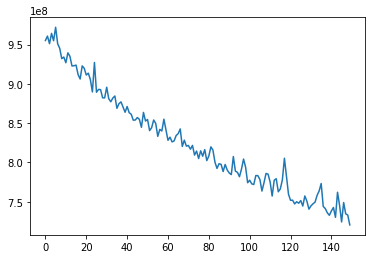

In [423]:
plt.plot(h['loss'])

In [424]:
model.evaluate(X, Y)

1100/1100 [==============================] - 0s 215us/step


[746905720.2618182, 746905600.0]

In [440]:
Y_ = model.predict(X_)

In [427]:
print(Y_)

[[ 44092.977]
 [ 98274.266]
 [ 75023.75 ]
 [ 97249.84 ]
 [ 59755.934]
 [207047.   ]
 [158756.98 ]
 [178608.08 ]
 [127499.74 ]
 [201935.45 ]
 [130484.42 ]
 [112070.89 ]
 [ 98477.82 ]
 [ 86224.2  ]
 [124305.39 ]
 [230340.5  ]
 [163795.11 ]
 [162015.38 ]
 [ 55617.914]
 [ 65474.113]
 [ 57701.797]
 [139269.17 ]
 [ 61616.637]
 [130460.914]
 [126605.95 ]
 [ 76834.41 ]
 [149623.23 ]
 [169878.28 ]
 [173026.14 ]
 [122141.29 ]
 [110597.87 ]
 [113323.34 ]
 [ 65942.06 ]
 [154890.23 ]
 [124764.82 ]
 [ 78321.086]
 [ 58522.906]
 [ 56663.688]
 [157280.89 ]
 [ 60130.418]
 [ 79795.06 ]
 [131785.34 ]
 [224027.5  ]
 [ 57731.21 ]
 [ 78567.695]
 [ 61348.55 ]
 [129216.81 ]
 [111479.914]
 [ 79385.64 ]
 [100079.47 ]
 [118898.945]
 [115637.87 ]
 [137300.12 ]
 [109386.83 ]
 [159770.05 ]
 [147642.23 ]
 [116042.32 ]
 [159972.31 ]
 [165142.17 ]
 [153057.38 ]
 [ 94589.2  ]
 [149876.45 ]
 [128453.06 ]
 [ 80478.695]
 [138602.2  ]
 [151099.39 ]
 [154473.16 ]
 [148943.5  ]
 [133241.75 ]
 [220593.36 ]
 [ 88344.37 ]
 [1151

In [441]:
hid = dft.values[:,0].reshape((-1,1))

print(hid.shape, Y_.shape)

(360, 1) (360, 1)


In [442]:
Y_ = np.hstack((hid, Y_))
print(Y_)
dfp = pd.DataFrame(Y_)
dfp.to_csv("./output_house_price.csv", index=False)

[[1101 44092.9765625]
 [1102 98274.265625]
 [1103 75023.75]
 [1104 97249.84375]
 [1105 59755.93359375]
 [1106 207047.0]
 [1107 158756.984375]
 [1108 178608.078125]
 [1109 127499.7421875]
 [1110 201935.453125]
 [1111 130484.421875]
 [1112 112070.890625]
 [1113 98477.8203125]
 [1114 86224.203125]
 [1115 124305.390625]
 [1116 230340.5]
 [1117 163795.109375]
 [1118 162015.375]
 [1119 55617.9140625]
 [1120 65474.11328125]
 [1121 57701.796875]
 [1122 139269.171875]
 [1123 61616.63671875]
 [1124 130460.9140625]
 [1125 126605.953125]
 [1126 76834.40625]
 [1127 149623.234375]
 [1128 169878.28125]
 [1129 173026.140625]
 [1130 122141.2890625]
 [1131 110597.8671875]
 [1132 113323.34375]
 [1133 65942.0625]
 [1134 154890.234375]
 [1135 124764.8203125]
 [1136 78321.0859375]
 [1137 58522.90625]
 [1138 56663.6875]
 [1139 157280.890625]
 [1140 60130.41796875]
 [1141 79795.0625]
 [1142 131785.34375]
 [1143 224027.5]
 [1144 57731.2109375]
 [1145 78567.6953125]
 [1146 61348.55078125]
 [1147 129216.8125]
 [